In [1]:
from keras.layers.core import Dense,Activation,Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
import lstm, time

In [3]:
seqence_length=50
X_train,y_train,X_test,y_test,p0 = lstm.load_data('SaleAmountData.csv',seqence_length,True)
#print(p0)

In [4]:
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=seqence_length,
    return_sequences=True
))
model.add(Dropout(0.2))

model.add(LSTM(
    256,
    return_sequences=True
))
model.add(Dropout(0.2))

model.add(LSTM(
    128,
    return_sequences=True
))
model.add(Dropout(0.2))

model.add(LSTM(
    64,
    return_sequences=False
))
model.add(Dense(
    output_dim=1
))

model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse',optimizer='rmsprop')
print('Compilation time:',time.time()-start)


Compilation time: 0.022131919860839844


In [5]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=100,
    validation_split=0.1
)

Train on 3230 samples, validate on 359 samples
Epoch 1/100
3230/3230 [==============================] - 46s 14ms/step - loss: 6.6553 - val_loss: 4.8414
Epoch 2/100
3230/3230 [==============================] - 44s 14ms/step - loss: 5.6520 - val_loss: 4.3818
Epoch 3/100
3230/3230 [==============================] - 43s 13ms/step - loss: 5.2854 - val_loss: 3.5301
Epoch 4/100
3230/3230 [==============================] - 46s 14ms/step - loss: 5.1135 - val_loss: 4.8099
Epoch 5/100
3230/3230 [==============================] - 38s 12ms/step - loss: 5.1320 - val_loss: 3.7346
Epoch 6/100
3230/3230 [==============================] - 36s 11ms/step - loss: 4.6686 - val_loss: 3.2486
Epoch 7/100
3230/3230 [==============================] - 37s 11ms/step - loss: 4.5610 - val_loss: 3.5337
Epoch 8/100
3230/3230 [==============================] - 39s 12ms/step - loss: 4.4878 - val_loss: 3.5304
Epoch 9/100
3230/3230 [==============================] - 38s 12ms/step - loss: 4.5575 - val_loss: 3.5234
Epoch 10

Epoch 78/100
3230/3230 [==============================] - 47s 15ms/step - loss: 2.8804 - val_loss: 3.4476
Epoch 79/100
3230/3230 [==============================] - 42s 13ms/step - loss: 2.8098 - val_loss: 3.3540
Epoch 80/100
3230/3230 [==============================] - 40s 12ms/step - loss: 2.8157 - val_loss: 3.3135
Epoch 81/100
3230/3230 [==============================] - 40s 12ms/step - loss: 2.8095 - val_loss: 3.1261
Epoch 82/100
3230/3230 [==============================] - 40s 12ms/step - loss: 2.8040 - val_loss: 3.2168
Epoch 83/100
3230/3230 [==============================] - 40s 12ms/step - loss: 2.7766 - val_loss: 3.5483
Epoch 84/100
3230/3230 [==============================] - 40s 12ms/step - loss: 2.9041 - val_loss: 3.5455
Epoch 85/100
3230/3230 [==============================] - 44s 14ms/step - loss: 2.8438 - val_loss: 3.4441
Epoch 86/100
3230/3230 [==============================] - 50s 15ms/step - loss: 2.8637 - val_loss: 3.1846
Epoch 87/100
3230/3230 [======================

yo


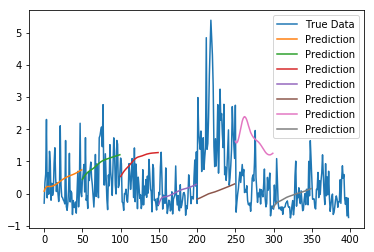

In [6]:
predictions=lstm.predict_sequences_multiple(model,X_test,seqence_length,seqence_length)
lstm.plot_results_multiple(predictions,y_test,seqence_length)

In [7]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

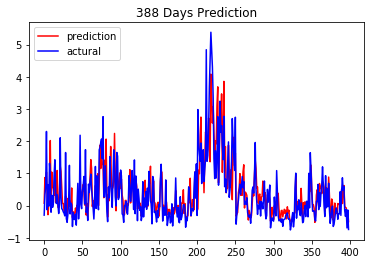

In [8]:
p = model.predict(X_test)
import matplotlib.pyplot as plt2

plt2.plot(p,color='red', label='prediction')
plt2.plot(y_test,color='blue', label='actural')
plt2.legend(loc='upper left')
plt2.title("388 Days Prediction")
plt2.show()

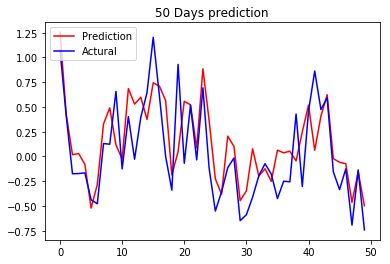

In [9]:
plt2.plot(p[-50:],color='red', label='Prediction')
plt2.plot(y_test[-50:],color='blue', label='Actural')
plt2.legend(loc='upper left')
plt2.title("50 Days prediction")
plt2.show()

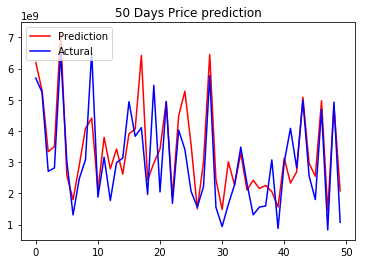

In [10]:
import numpy as np
size = np.shape(X_test)[0]

pred = p[:]
act = y_test[:]
for i in range(size):
    pn=float(p0[-(seqence_length+(size-i))])
    pred[i]=(pred[i]+1)*pn
    act[i]=(act[i]+1)*pn
plt2.plot(pred[-50:],color='red', label='Prediction')
plt2.plot(act[-50:],color='blue', label='Actural')
plt2.legend(loc='upper left')
plt2.title("50 Days Price prediction")
plt2.show()

In [11]:
ans=pred[-1]
print("最新预测",ans)

最新预测 [2.0776603e+09]


Sequence length: 100 | epoch:6 | prediction :600
Sequence length: 100 | epoch:100 | prediction :656
Sequence length: 60  | epoch:6 | prediction :652
Sequence length: 55  | epoch:6 | prediction :654
Sequence length: 50  | epoch:6 | prediction :642
Sequence length: 50 | epoch:100 | prediction :682